In [109]:
import zipfile
import os


In [110]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip


--2023-12-04 15:07:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.207, 173.194.206.207, 142.251.172.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  82.6MB/s    in 8.6s    

2023-12-04 15:08:06 (57.5 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [111]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [112]:
!ls 10_food_classes_all_data

test  train


In [113]:
!ls 10_food_classes_all_data/train

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [114]:
#!ls pizza_steak/train/pizza

In [115]:
for dir_path, dir_name, file_name in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in {dir_path}")
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in {dir_path}")
  print(f"There are {len(dir_name)} directories and {len(file_name)} files in {dir_path}")

There are 2 directories and 0 files in 10_food_classes_all_data
There are 2 directories and 0 files in 10_food_classes_all_data
There are 2 directories and 0 files in 10_food_classes_all_data
There are 10 directories and 0 files in 10_food_classes_all_data/test
There are 10 directories and 0 files in 10_food_classes_all_data/test
There are 10 directories and 0 files in 10_food_classes_all_data/test
There are 0 directories and 250 files in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 files in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 files in 10_food_classes_all_data/test/ice_cream
There are 0 directories and 250 files in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 files in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 files in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 files in 10_food_classes_all_data/test/grilled_salmon
There are 0 di

In [116]:
num_steak_images_train = len(os.listdir("10_food_classes_all_data/train/steak"))
print(num_steak_images_train)

750


In [117]:
num_pizza_images_train = len(os.listdir("10_food_classes_all_data/train/pizza"))
print(num_pizza_images_train)

750


In [118]:
num_steak_images_test = len(os.listdir("10_food_classes_all_data/test/steak"))
print(num_steak_images_test)

250


In [119]:
num_pizza_images_test = len(os.listdir("10_food_classes_all_data/test/pizza"))
print(num_pizza_images_test)

250


In [120]:
import pathlib
import numpy as np

In [121]:
test_dataset_path = pathlib.Path("10_food_classes_all_data/train")
classes = np.array([item.name for item in test_dataset_path.glob("*")])
print(classes)

['ice_cream' 'chicken_curry' 'grilled_salmon' 'ramen' 'pizza' 'hamburger'
 'fried_rice' 'chicken_wings' 'sushi' 'steak']


In [122]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [123]:
# function to visualize random images from the dataset.
def show_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # choose a random image.
  random_image = random.sample(os.listdir(target_folder), 1)

  # read the image.
  image = mpimg.imread(target_folder+ "/" + random_image[0])

  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape is: {image.shape}")

  return image

Image shape is: (512, 512, 3)


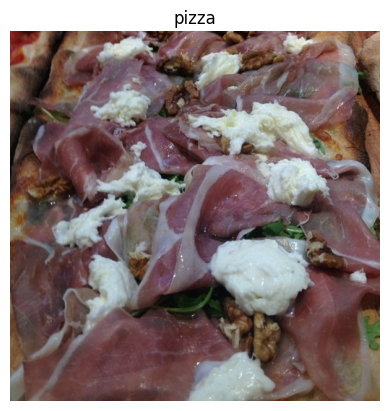

In [124]:
img = show_random_image("10_food_classes_all_data/train/", "pizza")

In [125]:
print(img/255)

[[[0.52941176 0.15686275 0.14117647]
  [0.52941176 0.15686275 0.14117647]
  [0.5254902  0.15294118 0.1372549 ]
  ...
  [0.52156863 0.37254902 0.29019608]
  [0.58431373 0.43529412 0.36078431]
  [0.65098039 0.50588235 0.43137255]]

 [[0.52156863 0.14901961 0.13333333]
  [0.52941176 0.15686275 0.14117647]
  [0.52156863 0.14901961 0.13333333]
  ...
  [0.67058824 0.52156863 0.43921569]
  [0.72156863 0.57647059 0.50196078]
  [0.76470588 0.62745098 0.54901961]]

 [[0.5254902  0.15294118 0.14509804]
  [0.5372549  0.16470588 0.15686275]
  [0.52941176 0.15686275 0.14901961]
  ...
  [0.79215686 0.65490196 0.57647059]
  [0.8        0.6627451  0.58823529]
  [0.79607843 0.66666667 0.59215686]]

 ...

 [[0.41176471 0.39607843 0.35294118]
  [0.41176471 0.39607843 0.35294118]
  [0.41568627 0.40784314 0.36078431]
  ...
  [0.46666667 0.36862745 0.25098039]
  [0.46666667 0.36862745 0.25098039]
  [0.4627451  0.36470588 0.24705882]]

 [[0.40392157 0.38823529 0.34509804]
  [0.40784314 0.39215686 0.34901961]


In [126]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [127]:
train_data_gen = ImageDataGenerator(rescale=1/255)
test_data_gen = ImageDataGenerator(rescale=1/255)

train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

train_data = train_data_gen.flow_from_directory(
    directory = train_dir,
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32
)

valid_data = test_data_gen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    color_mode='rgb',
    class_mode='categorical',
    target_size=(256,256)
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [128]:
image, label = train_data.next()

In [129]:
image.shape

(32, 256, 256, 3)

In [130]:
label.shape

(32, 10)

In [131]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

In [153]:
model = Sequential([
    Conv2D(filters=20, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(256, 256, 3)),
    Conv2D(filters=20, kernel_size=3, strides=1, padding='valid', activation='relu'),
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu'),




    MaxPool2D(pool_size=2),

    Flatten(),
    Dense(10, activation='softmax')

])

In [154]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [155]:
history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))


Epoch 1/5
235/235 [==============================] - 33s 136ms/step - loss: 2.2421 - accuracy: 0.1789 - val_loss: 2.1564 - val_accuracy: 0.2156
Epoch 2/5
235/235 [==============================] - 35s 150ms/step - loss: 1.6217 - accuracy: 0.4560 - val_loss: 2.2349 - val_accuracy: 0.2624
Epoch 3/5
235/235 [==============================] - 33s 138ms/step - loss: 0.4503 - accuracy: 0.8688 - val_loss: 3.3796 - val_accuracy: 0.2384
Epoch 4/5
235/235 [==============================] - 32s 138ms/step - loss: 0.0675 - accuracy: 0.9864 - val_loss: 5.1459 - val_accuracy: 0.2324
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 0.0244 - accuracy: 0.9961 - val_loss: 5.8733 - val_accuracy: 0.2152


<Axes: >

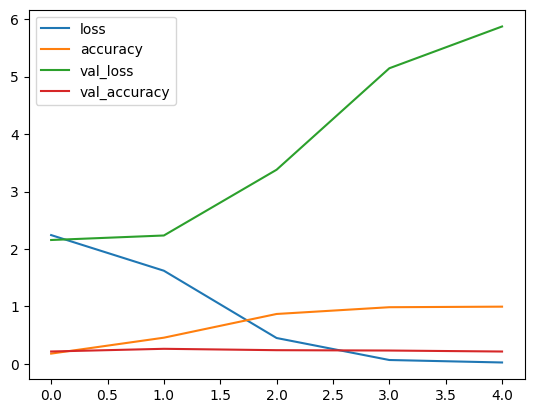

In [156]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [157]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1264 (Conv2D)        (None, 254, 254, 20)      560       
                                                                 
 conv2d_1265 (Conv2D)        (None, 252, 252, 20)      3620      
                                                                 
 conv2d_1266 (Conv2D)        (None, 250, 250, 10)      1810      
                                                                 
 max_pooling2d_140 (MaxPool  (None, 125, 125, 10)      0         
 ing2D)                                                          
                                                                 
 flatten_37 (Flatten)        (None, 156250)            0         
                                                                 
 dense_37 (Dense)            (None, 10)                1562510   
                                                     

In [137]:
print(classes)

['ice_cream' 'chicken_curry' 'grilled_salmon' 'ramen' 'pizza' 'hamburger'
 'fried_rice' 'chicken_wings' 'sushi' 'steak']


In [158]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg


--2023-12-04 15:20:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-12-04 15:20:05 (28.6 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



In [159]:
def load_and_prepare_images(image, image_shape=256):
  img = tf.io.read_file(image)
  # conver the img into tensor format.
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=[image_shape, image_shape])

  img = img/255

  return img


In [160]:
steak_img = load_and_prepare_images("03-steak.jpeg")

In [161]:
steak = tf.expand_dims(steak_img, axis=0)

In [162]:
steak.shape

TensorShape([1, 256, 256, 3])

In [163]:
steak_2 = tf.expand_dims(steak_img, axis = 1)

In [164]:
steak_2.shape

TensorShape([256, 1, 256, 3])

In [145]:
steak_3 = tf.expand_dims(steak_img, axis=3)

In [146]:
steak_3.shape

TensorShape([256, 256, 3, 1])

In [147]:
pred = model.predict(steak)
pred

1/1 [==============================] - 0s 217ms/step


array([[1.0634954e-05, 1.3830501e-04, 5.5270534e-06, 6.3972053e-05,
        8.0801378e-04, 5.7783986e-06, 1.0864616e-07, 6.0895461e-01,
        4.0776524e-04, 3.8960534e-01]], dtype=float32)

In [148]:
pred[0][0]

1.0634954e-05

In [149]:
final_pred = classes[int(tf.round(pred[0][0]))]
final_pred

'ice_cream'

In [165]:
def predict_image(model, load_and_prepare_images, image, classes):
  img_bef_exp = load_and_prepare_images(image)
  img = tf.expand_dims(img_bef_exp, axis=0)

  pred_prob = model.predict(img)
  if len(pred_prob[0]) > 1:
    pred = classes[pred_prob.argmax()]
  else:
    pred = classes[int(tf.round(pred_prob[0][0]))]

  plt.imshow(img_bef_exp)
  plt.title(f"Prediction: {pred}")
  plt.axis(False)

1/1 [==============================] - 0s 97ms/step


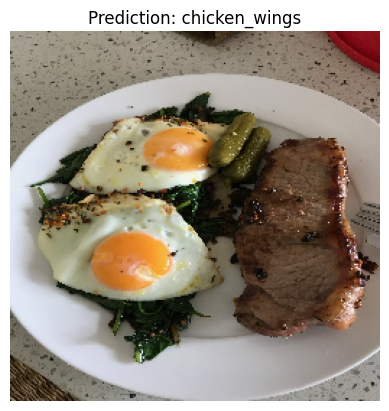

In [166]:
predict_image(model, load_and_prepare_images, "03-steak.jpeg", classes)